In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from catboost import CatBoostClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
import re
from nltk.corpus import stopwords
import nltk
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../data/singapore_airlines_reviews.csv")

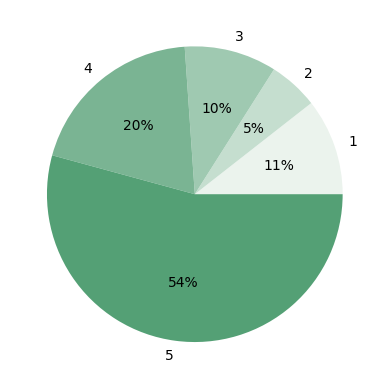

In [3]:
reviews = ["1", "2", "3", "4", "5"]
number_of_reviews = [data['rating'].value_counts()[x] for x in range(1, 6)]

#define Seaborn color palette to use
colors = sns.light_palette('seagreen')[0:5]

#create pie chart
plt.pie(number_of_reviews, labels = reviews, colors = colors, autopct='%.0f%%')
plt.show()

In [4]:
# Simplify target

data['rating'] = data['rating'] > 3
data['rating'] = data['rating'].astype(int)

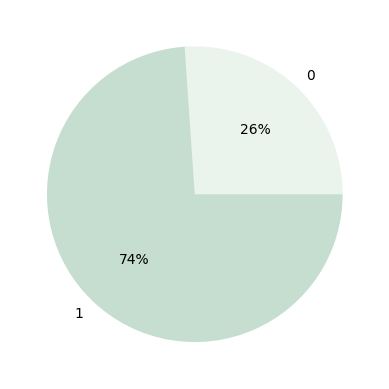

In [5]:
reviews = [0, 1]
number_of_reviews = [data['rating'].value_counts()[x] for x in range(0, 2)]

#define Seaborn color palette to use
colors = sns.light_palette('seagreen')[0:2]

#create pie chart
plt.pie(number_of_reviews, labels = reviews, colors = colors, autopct='%.0f%%')
plt.show()

# **Easy**

- Выбрать метрику.

- Удалить пунктуацию из датасета.

- Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

```f1_score``` is applicable, since we are dealing with imbalanced data

In [6]:
def delete_punctuation_from_string(s: str):
    return re.sub(r'[^\w\s]','', s)

In [7]:
data["text_title"] = data["title"] + " " + data["text"]

In [8]:
data.loc[:, "text_title"] = data["text_title"].astype(str)
data.loc[:, "text_title"] = data["text_title"].apply(delete_punctuation_from_string)

In [9]:
train, test = train_test_split(data, random_state=239)

In [10]:
bow = CountVectorizer()

x_train = bow.fit_transform(train["text_title"])
x_test = bow.transform(test["text_title"])
y_train = train["rating"]
    
model = CatBoostClassifier(verbose=0)
model.fit(x_train, y_train)

y_test = test["rating"]

y_pred = model.predict(x_test)

f1_score(y_pred, y_test)

0.9396574440052701

# **Normal**
Удалить стоп-слова, применить стемминг/лемматизацию. Обучить несколько моделей, подобрать параметры, сделать выводы.

Написать самостоятельно два отзыва - один положительный, один негативный, посмотреть, угадает ли модель.

In [11]:
l = WordNetLemmatizer()

def lemmatize(x):
    x = map(lambda r:  ' '.join([l.lemmatize(i.lower()) for i in r.split()]), x)
    x = np.array(list(x))
    return x

stop_words = stopwords.words('english')

def delete_stop_word(s):
    words = s.split()
    return " ".join([word for word in words if word.lower() not in stop_words])

In [12]:
# apply lemmatization

train["text_title"] = lemmatize(train["text_title"])
test["text_title"] = lemmatize(test["text_title"])

In [13]:
# delete stop words

train["text_title"] = train["text_title"].apply(delete_stop_word)
test["text_title"] = test["text_title"].apply(delete_stop_word)

In [14]:
# Choose hyperparameters

parameters = {"depth": [3, 5, 6],
          "iterations": [300, 500, 700],
          "learning_rate": [0.05, 0.1]
}

In [15]:
bow = CountVectorizer()

x_train = bow.fit_transform(train["text_title"])
x_test = bow.transform(test["text_title"])
y_train = train["rating"]

clf = GridSearchCV(CatBoostClassifier(verbose=0), parameters)
clf.fit(x_train, y_train)

y_test = test["rating"]

y_pred = clf.predict(x_test)

In [16]:
f1_score(y_pred, y_test)

0.9401888772298006

In [17]:
reviews = ["AMAZING I LOVE YOU ALL THERE", "I used your service once, but it was terrible"]

reviews = lemmatize(reviews)
reviews = bow.transform(reviews)

clf.predict(reviews)

array([1, 0], dtype=int64)

### Predictions are correct!